# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Wildan Amiinuddin
- **Email:** amiinuddinwildan123@gmail.com
- **ID Dicoding:** wildanamiiin

## Menentukan Pertanyaan Bisnis

- Berapa banyak orang yang menjadi registered users dibanding casual users?
- Apakah musim berpengaruh terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

Impor tabel day

In [2]:
day_df = pd.read_csv("/kaggle/input/bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Impor tabel hour

In [3]:
hr_df = pd.read_csv("/kaggle/input/bike-sharing-dataset/hour.csv")
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Pada tahap ini kita akan pisah pemeriksaan data day.df dan hr.df menjadi 2 bagian

Assessing Data day_df

1. Cek Tipe Data

In [4]:
#Mengecek tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terlihat data pada kolom dteday sepertinya lebih baik kita ubah menjadi datetime

2. Cek duplikasi data

In [5]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


Tidak ada duplikasi data, lanjut...

3. Cek Missing Values

In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing value tidak terdeteksi

4. Cek parameter statistik data

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada keanehan, data sudah oke

Assesing data hr_df

1. Cek tipe data

In [8]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tipe data dteday sama seperti day_df, akan kita ubah menjadi datetime

2. Cek duplikasi data

In [9]:
print("Jumlah duplikasi data: ", hr_df.duplicated().sum())

Jumlah duplikasi data:  0


Tidak ada data terduplikasi

3. Cek Missing values

In [10]:
hr_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada data missing values

4. Cek parameter statistik

In [11]:
hr_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada keanehan, data sudah oke

### Cleaning Data

1. Hapus tabel yang dirasa tidak diperlukan

Saya aka menghapus tabel hr dikarenakan tidak ada pertanyaan bisnis yang berkaitan dengan tabel hr

In [12]:
del hr_df

2. Hapus kolom yang tidak diperlukan

Beberapa kolom seperti instant dan windspeed perlu dihapus karena tidak berkorelasi dengan pertanyaan bisnis.

In [13]:
day_df.drop(['instant', 'windspeed'], axis = 1, inplace= True)

cek hasil pada day_df

In [14]:
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


3. Mengubah judul kolom supaya lebih mudah dibaca

In [15]:
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

4. Mengubah tipe data dateday ke datetime

In [16]:
day_df['dateday'] = pd.to_datetime(day_df.dateday)

5. Mengubah tipe data ke kategorikal

In [17]:
# Mengubah angka menjadi keterangan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})
day_df['year'] = day_df['year'].map({
    0: '2011', 1: '2012'
})

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()


,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,2011,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore jumlah penyewa setiap musimnya

In [18]:
day_df.groupby(by='season').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'
})

/tmp/ipykernel_33/2667865633.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


,casual,registered,count
season,,,
Fall,226091,835038,1061129
Spring,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


Dapat kita lihat penyewaan sepeda secara keseluruhan paling banyak terjadi pada Fall Season

### Explore jumlah penyewa berdasarkan tahun

In [19]:
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"],
    "count": ["sum"]
})

/tmp/ipykernel_33/1564986317.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="year").agg({


,registered,casual,count
,sum,sum,sum
year,,,
2011,995851,247252,1243103
2012,1676811,372765,2049576


Dapat kita lihat bahwa jumlah penyewaan sepeda bertambah terus bertambah tiap tahunnya baik dari registered user ataupun casual user

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa banyak orang yang menjadi registered users dibanding casual users?


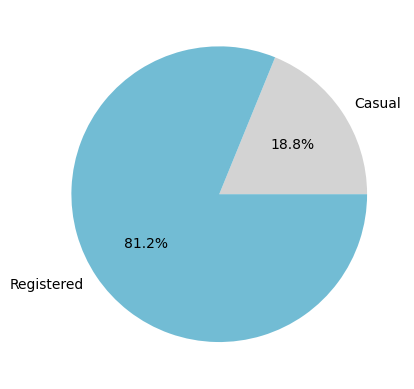

In [20]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])

# Menampilkan pie plot
plt.show()

Tercatat 81.2% Pelanggan merupakan Registered User dan 18.8% merupakan Casual User

### Pertanyaan 2: Apakah musim berpengaruh terhadap jumlah penyewaan sepeda baik registered maupun casual user?

/tmp/ipykernel_33/379291322.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()


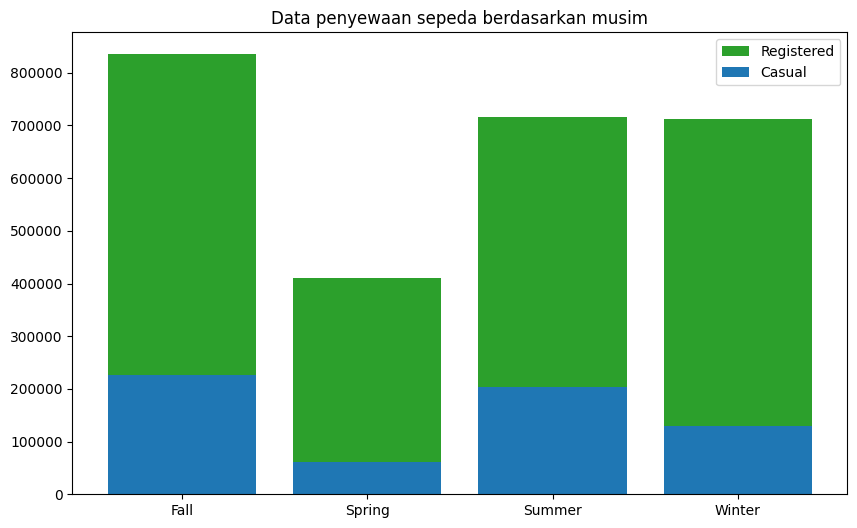

In [21]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:green'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:blue'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Data penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

## Conclusion

- Conclution pertanyaan 1 :
Berdasarkan visualisasi data yang telah diterapkan, 81.2% Pelanggan sudah menjadi Registered User. Sedangkan, sisanya sebanyak 18.8% merupakan Casual User.
- Conclution pertanyaan 2 :
Dapat kita simpulkan bahwa musim memberikan pengaruh terhadap penyewaan sepeda. Dalam data tersebut, Fall Season atau Musim Gugur merupakan musim yang paling banyak dilakukan penyewaan yaitu sebesar 1.061.129 penyewaan dan Musim Semi paling sedikit yaitu sebesar 471.348 penyewaan

Export data untuk ditempatkan di folder streamlit

In [22]:
day_df.to_csv("final_data.csv", index=False)